<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas ## et matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print('Type de données dans chacune des colonnes')
print(population.dtypes)
print()
#Le nombre de valeurs présentes dans chacune des colonnes
print('Nombre de valeurs présentes dans chacune des colonnes')
population.count()

Le tableau comporte 3 colonne(s)
Type de données dans chacune des colonnes
Zone       object
Année       int64
Valeur    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes


Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur' : 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations(s) ou articles()".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observations(s) ou articles()
Le tableau comporte 18 colonnes


In [10]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))
dispo_alimentaire.dtypes

Le tableau comporte 18 colonnes


Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace = True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.columns
liste_convT2KG = [
    'Aliments pour animaux',
    'Autres Utilisations',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Pertes',
    'Production',
    'Semences',
    'Traitement',
    'Variation de stock'
]
dispo_alimentaire[liste_convT2KG] = dispo_alimentaire[liste_convT2KG] * 1000000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observations(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))
aide_alimentaire.dtypes

Le tableau comporte 4 colonne(s)


Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire' : 'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']=aide_alimentaire['Valeur'] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))
sous_nutrition.dtypes

Le tableau comporte 3 colonne(s)


Zone      object
Année     object
Valeur    object
dtype: object

In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
###sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.fillna(0, inplace = True)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur' : 'sous_nutrition'}, inplace = True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
##Isolation population 2017
population2017 = population.loc[population['Année'] ==2017]
##Isolation de la sous_nutrition en 2017
sous_nutrition2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018']
##Merge des deux dataframe avec la zone comme clé
Etat2017 = pd.merge(sous_nutrition2017, population2017, on='Zone')

In [30]:
#Affichage du dataset
Etat2017.head()

,Zone,Année_x,sous_nutrition,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Allemagne,2016-2018,0.0,2017,82658409.0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Nombre de personnes en état de sous nutrition en 2017, est de {} personnes(s)".format(int(Etat2017['sous_nutrition'].sum())))

Nombre de personnes en état de sous nutrition en 2017, est de 535700000 personnes(s)


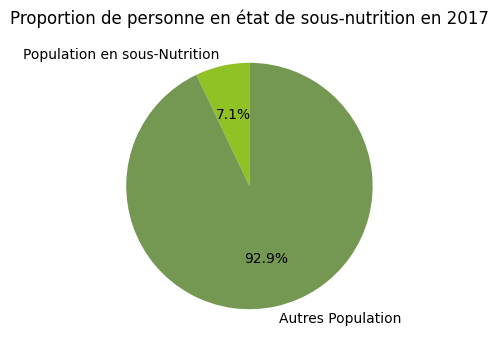

In [32]:
##Calcul du nombre de la proportion de personne en sous nutrition : 
## création d'un graphique
Sous_nut2017 = Etat2017['sous_nutrition'].sum()
Normal_nut2017 = Etat2017['Population'].sum() - Sous_nut2017
labels = ['Population en sous-Nutrition', 'Autres Population']
values = [Sous_nut2017, Normal_nut2017]
plt.figure(figsize=(4,4))
plt.pie(values, labels= labels, autopct='%1.1f%%', startangle=90, colors=['#90c226', '#749751'])
plt.title("Proportion de personne en état de sous-nutrition en 2017")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [33]:
#Combien mange en moyenne un être humain ? Source => https://www.fao.org/4/AA040E/AA040E06.htm#ch6
# ESTIMATES OF ENERGY AND PROTEIN REQUIREMENTS OF ADULTS AND CHILDREN
calories_moyen_jour = (1900, 2500)

In [34]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
## Dataframe avec colonnes Zone et disponibilité alimentaire en kcal 
dispo_alim2017 = dispo_alimentaire.drop(['Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'], axis=1)
##regroupement de la disponibilité par zone geographique
dispo_alim2017 = dispo_alim2017.groupby(['Zone']).sum()
##merge avec la population en 2017
Dispo2017 = pd.merge(dispo_alim2017, population2017, on='Zone')

In [35]:
#Affichage du nouveau dataframe
Dispo2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36296113.0
1,Afrique du Sud,3020.0,2017,57009756.0
2,Albanie,3188.0,2017,2884169.0
3,Algérie,3293.0,2017,41389189.0
4,Allemagne,3503.0,2017,82658409.0
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487203.0
168,Équateur,2346.0,2017,16785361.0
169,États-Unis d'Amérique,3682.0,2017,325084756.0
170,Éthiopie,2129.0,2017,106399924.0


In [36]:
#Création de la colonne dispo_kcal/an avec calcul des kcal disponibles mondialement
Dispo2017['dispo_kcal/an'] = Dispo2017['Disponibilité alimentaire (Kcal/personne/jour)']* Dispo2017['Population']*365

In [37]:
Dispo2017.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,dispo_kcal/an
0,Afghanistan,2087.0,2017,36296113.0,2.764875e+13
1,Afrique du Sud,3020.0,2017,57009756.0,6.284185e+13
2,Albanie,3188.0,2017,2884169.0,3.356077e+12
3,Algérie,3293.0,2017,41389189.0,4.974753e+13
4,Allemagne,3503.0,2017,82658409.0,1.056866e+14


In [38]:
Dispo2017.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,dispo_kcal/an
11,Autriche,3770.0,2017,8819901.0,1.213662e+13
16,Belgique,3737.0,2017,11419748.0,1.557659e+13
157,Turquie,3708.0,2017,81116450.0,1.097846e+14
169,États-Unis d'Amérique,3682.0,2017,325084756.0,4.368912e+14
74,Israël,3610.0,2017,8243848.0,1.086251e+13
72,Irlande,3602.0,2017,4753279.0,6.249278e+12
75,Italie,3578.0,2017,60673701.0,7.923803e+13
89,Luxembourg,3540.0,2017,591910.0,7.648069e+11
166,Égypte,3518.0,2017,96442591.0,1.238390e+14
4,Allemagne,3503.0,2017,82658409.0,1.056866e+14


In [39]:
print ("La dispo alimentaire totale est de",Dispo2017['dispo_kcal/an'].sum(), "kcal")

La dispo alimentaire totale est de 7635429388975815.0 kcal


In [40]:
#Calcul du nombre d'humains pouvant être nourris
print('La population totale en 2017 est de {} habitants'.format(int(population2017['Population'].sum())))
print('Le nombre de kcal disponibles en 2017 sont de : {} kcal/an'.format(int(Dispo2017['dispo_kcal/an'].sum())))
print()
#création des variables pour avoir une estimation selon les consommations
kcal_dispo_total = (int(Dispo2017['dispo_kcal/an'].sum()))
population_total = (int(population2017['Population'].sum()))
calories_moyennes = range(1900, 2501, 100)
    
for nourries in calories_moyennes :
    humain = int(kcal_dispo_total// nourries // 365)
    print("il est possible de nourrir ", humain,"humains/an avec une dépense de", nourries,"kcal/jours")

La population totale en 2017 est de 7548134111 habitants
Le nombre de kcal disponibles en 2017 sont de : 7635429388975815 kcal/an

il est possible de nourrir  11009991909 humains/an avec une dépense de 1900 kcal/jours
il est possible de nourrir  10459492313 humains/an avec une dépense de 2000 kcal/jours
il est possible de nourrir  9961421251 humains/an avec une dépense de 2100 kcal/jours
il est possible de nourrir  9508629376 humains/an avec une dépense de 2200 kcal/jours
il est possible de nourrir  9095210707 humains/an avec une dépense de 2300 kcal/jours
il est possible de nourrir  8716243594 humains/an avec une dépense de 2400 kcal/jours
il est possible de nourrir  8367593850 humains/an avec une dépense de 2500 kcal/jours


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [41]:
#Transfert des données avec les végétaux dans un nouveau dataframe
##identification et retrait des colonnes non utiles
Vegetaux = ['Produit', 'Aliments pour animaux',
       'Autres Utilisations',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock']
dispo_veget = dispo_alimentaire.drop(Vegetaux, axis=1)
##regroupement par zone et origine
dispo_veget = dispo_veget.groupby(['Zone', 'Origine'],as_index = False).sum()
## conservation des vegetaux uniquement
dispo_veget = dispo_veget[dispo_veget['Origine'] == 'vegetale'].reset_index(drop=True)
## merge avec la population 2017
dispo_vegetaux2017 = pd.merge(dispo_veget, population2017, on='Zone')

In [42]:
dispo_vegetaux2017

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,vegetale,1871.0,2017,36296113.0
1,Afrique du Sud,vegetale,2533.0,2017,57009756.0
2,Albanie,vegetale,2203.0,2017,2884169.0
3,Algérie,vegetale,2915.0,2017,41389189.0
4,Allemagne,vegetale,2461.0,2017,82658409.0
...,...,...,...,...,...
167,Émirats arabes unis,vegetale,2718.0,2017,9487203.0
168,Équateur,vegetale,1732.0,2017,16785361.0
169,États-Unis d'Amérique,vegetale,2698.0,2017,325084756.0
170,Éthiopie,vegetale,2005.0,2017,106399924.0


In [43]:
#Calcul du nombre de kcal disponible pour les végétaux
## création de la colonne dispo_kcal_an
dispo_vegetaux2017['dispo_kcal/an'] = dispo_vegetaux2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetaux2017['Population']*365
## Calcul du nombre de dispo_kcal/an total
kcalvegtotal = int(dispo_vegetaux2017['dispo_kcal/an'].sum())
print("La disponibilité alimentaire total en végétaux est de ", kcalvegtotal,"kcal/an")

La disponibilité alimentaire total en végétaux est de  6300178937197865 kcal/an


In [44]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
kcalvegtotal = int(dispo_vegetaux2017['dispo_kcal/an'].sum())
population_total = (int(population2017['Population'].sum()))
calories_moyennes = range(1900, 2501, 100)

for nourries in calories_moyennes :
    humain = int(kcalvegtotal// nourries // 365)
    print("il est possible de nourrir avec des vegetaux", humain,"humains/an avec une dépense de", nourries,"kcal/jours")

il est possible de nourrir avec des vegetaux 9084612742 humains/an avec une dépense de 1900 kcal/jours
il est possible de nourrir avec des vegetaux 8630382105 humains/an avec une dépense de 2000 kcal/jours
il est possible de nourrir avec des vegetaux 8219411529 humains/an avec une dépense de 2100 kcal/jours
il est possible de nourrir avec des vegetaux 7845801914 humains/an avec une dépense de 2200 kcal/jours
il est possible de nourrir avec des vegetaux 7504680091 humains/an avec une dépense de 2300 kcal/jours
il est possible de nourrir avec des vegetaux 7191985088 humains/an avec une dépense de 2400 kcal/jours
il est possible de nourrir avec des vegetaux 6904305684 humains/an avec une dépense de 2500 kcal/jours


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [45]:
#Calcul de la disponibilité totale
dispo_int_total = int(dispo_alimentaire['Disponibilité intérieure'].sum())
print("La dispo interieur total est de", dispo_int_total,"Kg")

La dispo interieur total est de 9848994000000 Kg


In [46]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
Dispo_util = dispo_alimentaire.drop(['Zone', 'Produit', 'Origine',
       'Disponibilité intérieure', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Variation de stock'], axis = 1)

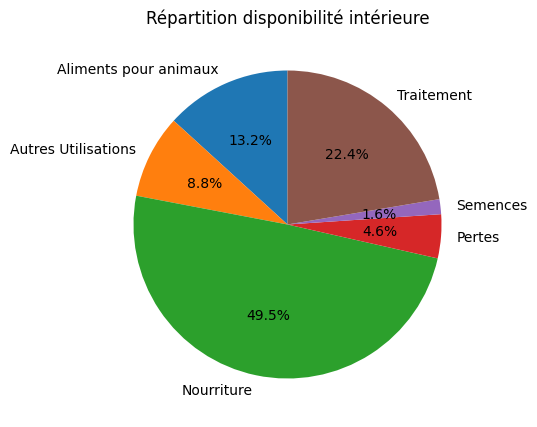

In [47]:
# Liste pour stocker les sommes des colonnes restantes
values = []
labels = Dispo_util.columns

# Boucle pour calculer la somme de chaque colonne
for col in Dispo_util.columns:
    values.append(Dispo_util[col].sum())

# Création du graphique en camembert
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Répartition disponibilité intérieure')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [48]:
#Création d'une liste avec toutes les variables
Céréale =[
 'Blé',
 'Riz (Eq Blanchi)', 
 'Orge',
 'Maïs',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho',
 'Céréales', 
 'Autres']

In [49]:
#Création d'un dataframe avec les informations uniquement pour ces céréales                                            
dispo_util_céréale = dispo_alimentaire.drop(['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'Exportations - Quantité',
       'Importations - Quantité', 'Variation de stock', 'Production'], axis =1)
dispo_cereale = dispo_util_céréale.loc[dispo_util_céréale['Produit'].isin(Céréale)]
dispo_cereale.sum()

Produit                     BléMaïsMilletOrgeRiz (Eq Blanchi)AvoineBléMaïs...
Aliments pour animaux                                          854500000000.0
Autres Utilisations                                            233399000000.0
Disponibilité intérieure                                      2379514000000.0
Nourriture                                                    1023686000000.0
Pertes                                                         106335000000.0
Semences                                                        67335000000.0
Traitement                                                      94429000000.0
dtype: object

In [50]:
dispo_cereale.dtypes

Produit                      object
Aliments pour animaux       float64
Autres Utilisations         float64
Disponibilité intérieure    float64
Nourriture                  float64
Pertes                      float64
Semences                    float64
Traitement                  float64
dtype: object

In [51]:
dispo_cereale['Produit'].unique().tolist()

['Blé',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Avoine',
 'Seigle',
 'Sorgho']

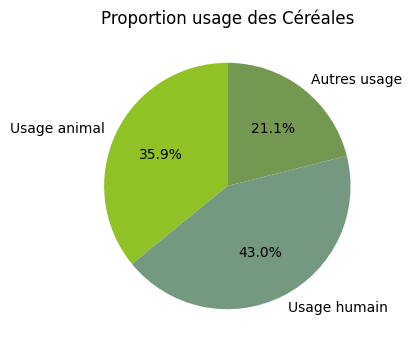

In [52]:
#Affichage de la proportion d'alimentation animale
total_animaux = dispo_cereale['Aliments pour animaux'].sum()
total_humain = dispo_cereale['Nourriture'].sum()
total_non_animaux = dispo_cereale['Disponibilité intérieure'].sum() - total_animaux - total_humain

# Créer les données pour le graphique
labels = ['Usage animal', 'Usage humain', 'Autres usage']
values = [total_animaux, total_humain, total_non_animaux]
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#90c226','#749980','#749751'])
plt.title("Proportion usage des Céréales")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [53]:
#Création de la colonne proportion par pays
Etat2017['Proportion'] = round(Etat2017['sous_nutrition'] / Etat2017['Population']*100,2)
Etat2017 = Etat2017.drop(['Année_x', 'sous_nutrition', 'Année_y', 'Population'], axis=1)

In [54]:
#affichage après trie des 10 pires pays
TOP10=Etat2017.sort_values('Proportion', ascending = False).head(10).reset_index(drop=True)

Text(0, 0.5, 'Proportion')

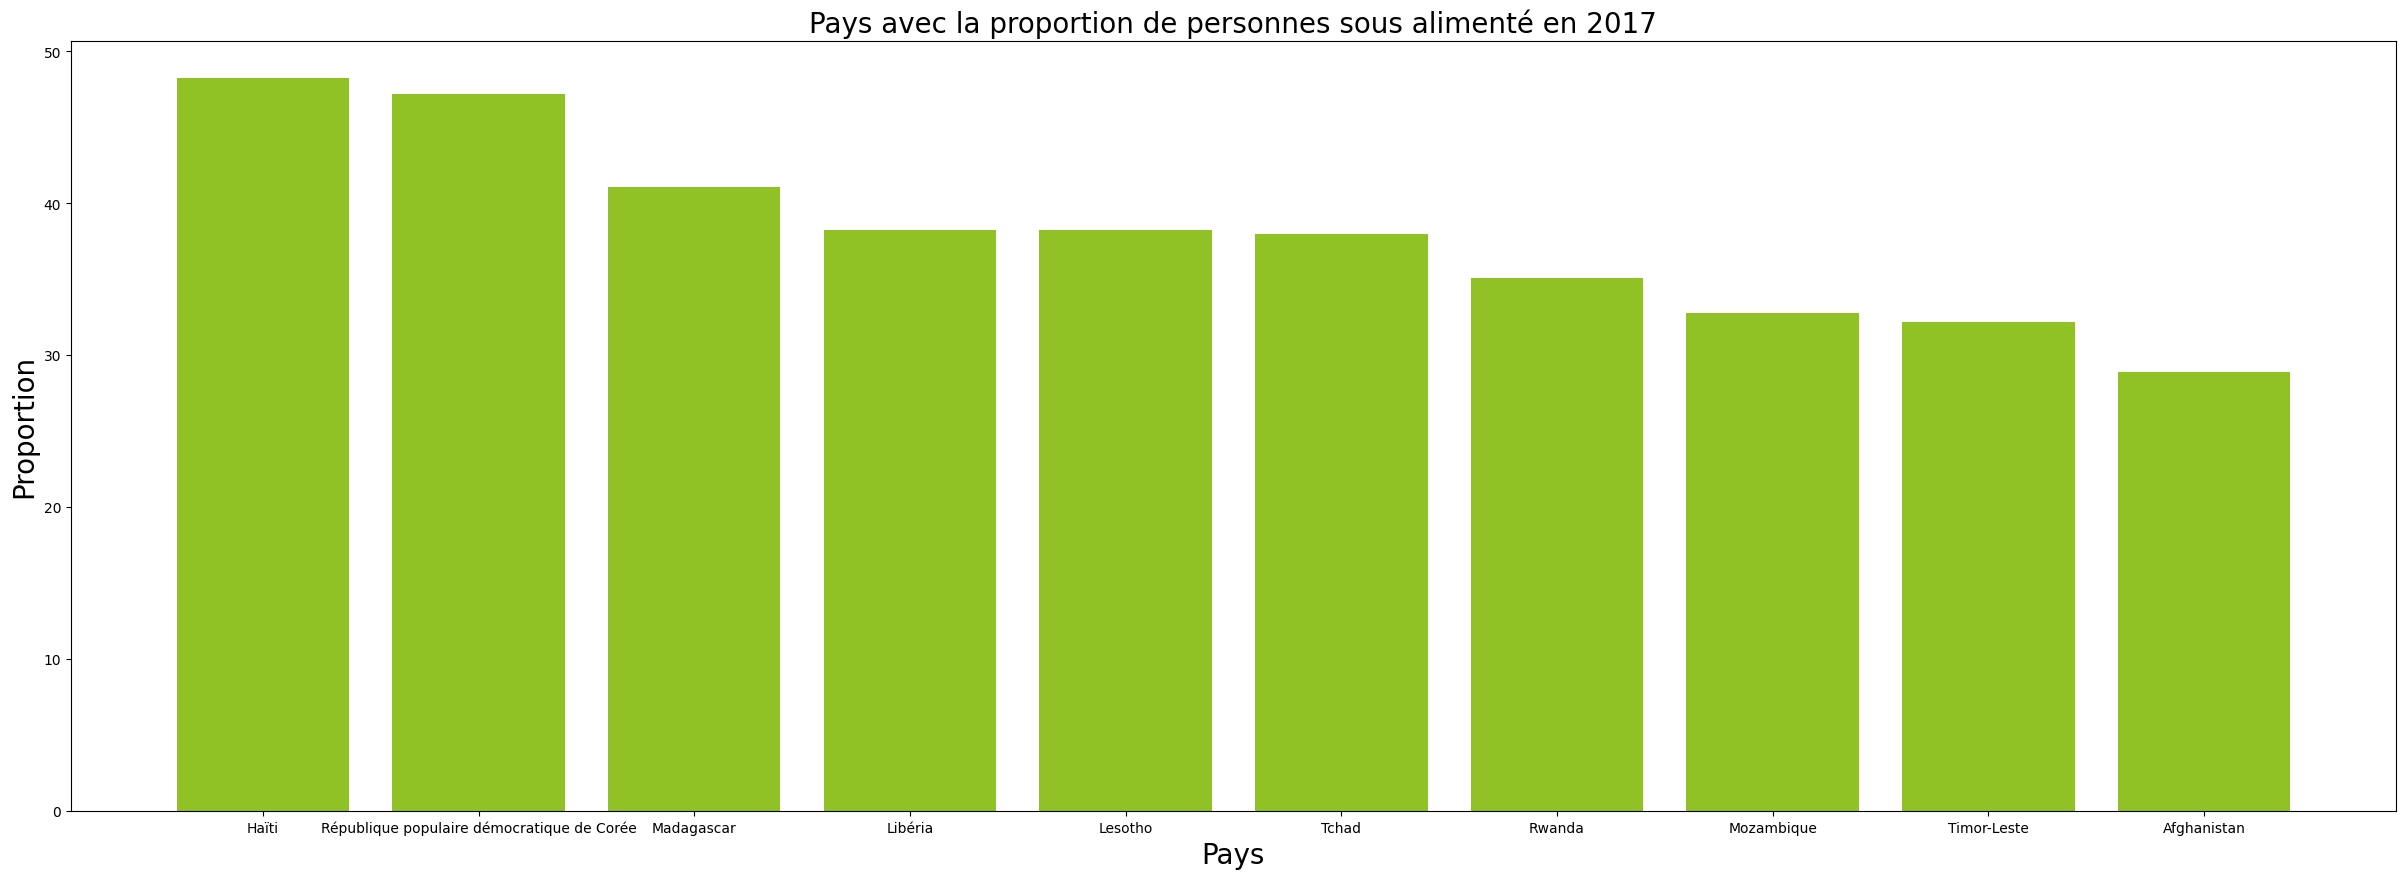

In [55]:
plt.figure(figsize=(30, 10))
plt.bar(height=TOP10['Proportion'],x=TOP10['Zone'], color='#90c226')
plt.title('Pays avec la proportion de personnes sous alimenté en 2017', fontsize=20)
plt.xlabel('Pays', fontsize=20)
plt.ylabel('Proportion', fontsize=20)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [56]:
#calcul du total de l'aide alimentaire par pays
Benef_Pays = (aide_alimentaire.groupby('Zone').sum())

In [57]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
Benef_Pays.drop(['Année', 'Produit'], axis=1, inplace = True)
Benef_Plus = Benef_Pays.sort_values('Valeur', ascending = False).head(10).reset_index()
Benef_Plus

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


Text(0, 0.5, 'Valeur')

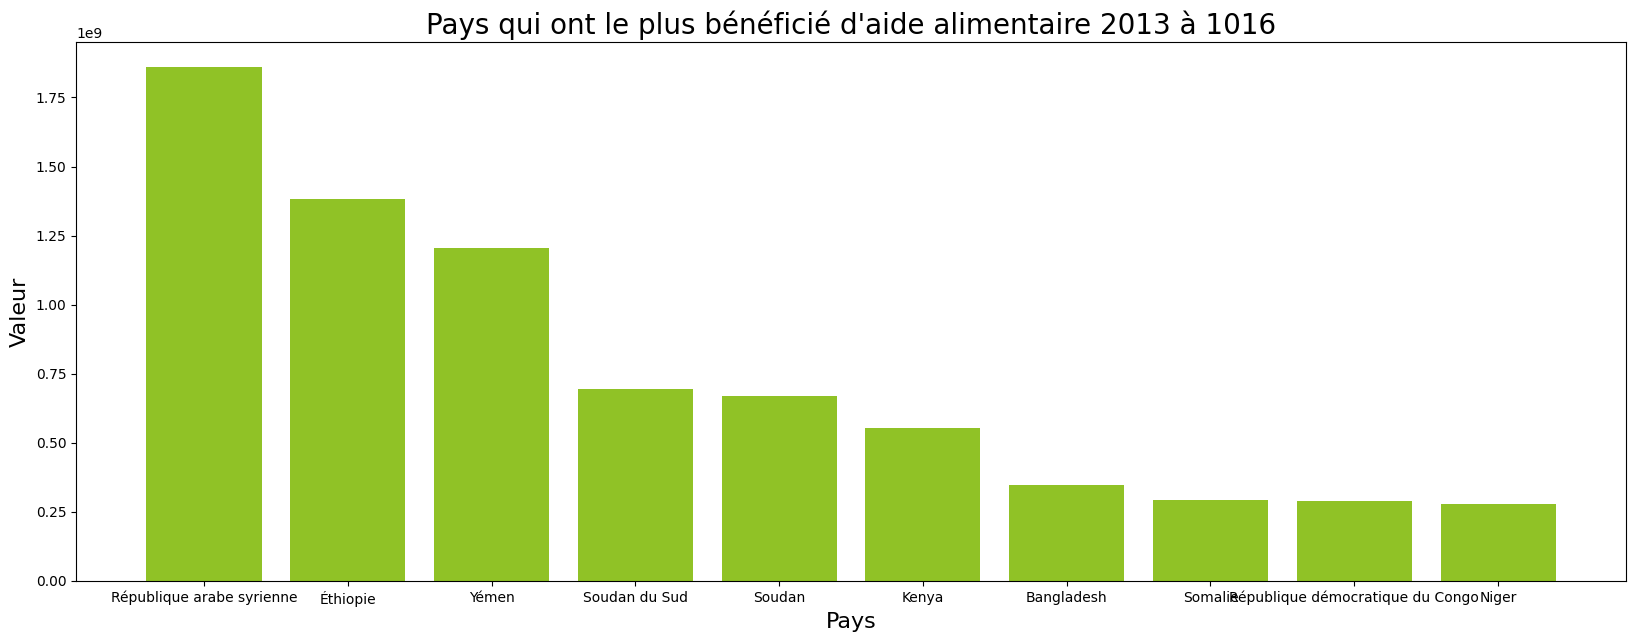

In [58]:
plt.figure(figsize=(20, 7))
plt.bar(height=Benef_Plus['Valeur'],x=Benef_Plus['Zone'], color='#90c226')
plt.title("Pays qui ont le plus bénéficié d'aide alimentaire 2013 à 1016", fontsize=20)
plt.xlabel('Pays', fontsize=16)
plt.ylabel('Valeur', fontsize=16)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [59]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
Evol_Aide = aide_alimentaire.drop('Produit', axis = 1)
Evol_Aide = Evol_Aide.pivot_table(
    index='Zone',
    columns='Année',
    values = 'Valeur',
    aggfunc='sum',
    fill_value=0)

In [60]:
##Ajout d'une colonne Total
Evol_Aide['Total'] = Evol_Aide.sum(axis=1)

In [61]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
Top5 = Evol_Aide.sort_values(['Total'], ascending = False).head(5).index.tolist()
Top5

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [62]:
#On filtre sur le dataframe avec notre liste
Evol_Aide.reset_index(inplace = True)
Evol_Aide = Evol_Aide.loc[Evol_Aide['Zone'].isin(Top5)]

In [63]:
Evol_Aide=Evol_Aide.reset_index()

In [64]:
# Affichage des pays avec l'aide alimentaire par année
##regroupement des années dans une colonne unique en préparation du graphique
Evol_Aide_melted = Evol_Aide.melt(id_vars=['Zone'], 
                   value_vars=[2013,2014,2015,2016])
Evol_Aide_melted.head(10)

,Zone,Année,value
0,République arabe syrienne,2013,563566000
1,Soudan,2013,330230000
2,Soudan du Sud,2013,196330000
3,Yémen,2013,264764000
4,Éthiopie,2013,591404000
5,République arabe syrienne,2014,651870000
6,Soudan,2014,321904000
7,Soudan du Sud,2014,450610000
8,Yémen,2014,103840000
9,Éthiopie,2014,586624000


In [65]:
##conversion du type objet en intégral.
Evol_Aide_melted['Année'] = Evol_Aide_melted['Année'].astype(int)

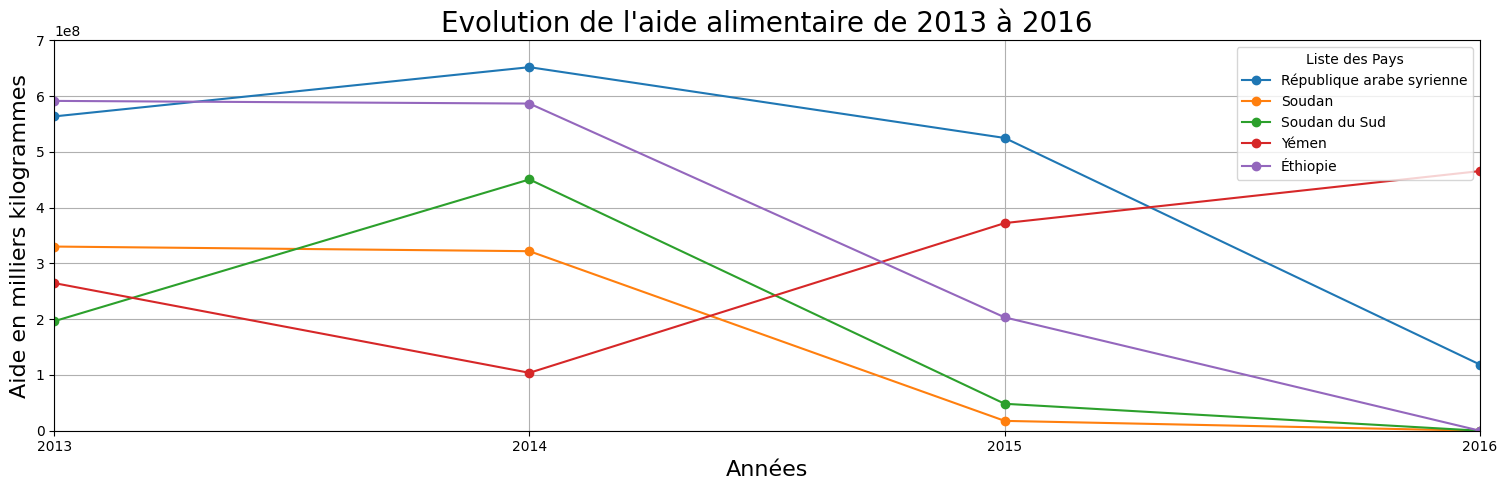

In [66]:
aide=[]
plt.figure(figsize=(15,5))
for aide in Evol_Aide_melted['Zone'].unique():
    subset = Evol_Aide_melted[Evol_Aide_melted['Zone'] == aide]
    plt.plot(subset['Année'], subset['value'], marker = 'o', label = aide)

plt.title("Evolution de l'aide alimentaire de 2013 à 2016", fontsize=20)
plt.xlabel('Années', fontsize=16)
plt.ylabel('Aide en milliers kilogrammes', fontsize=16)
plt.legend(title='Liste des Pays')
plt.xticks(Evol_Aide_melted['Année'].unique())
plt.grid(True)
plt.tight_layout()
plt.ylim(0,700000000)
plt.xlim(2013,2016)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [67]:
#Calcul de la disponibilité en kcal par personne par jour par pays
Dispo_Pays = dispo_alimentaire.drop(['Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],axis=1)

In [68]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
Dispo_moins = Dispo_Pays.groupby('Zone').sum()
Dispo_moins = Dispo_moins.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending = True).head(10).reset_index()

Text(0, 0.5, 'Disponibilité alimentaire en quantité (kg/personne/an)')

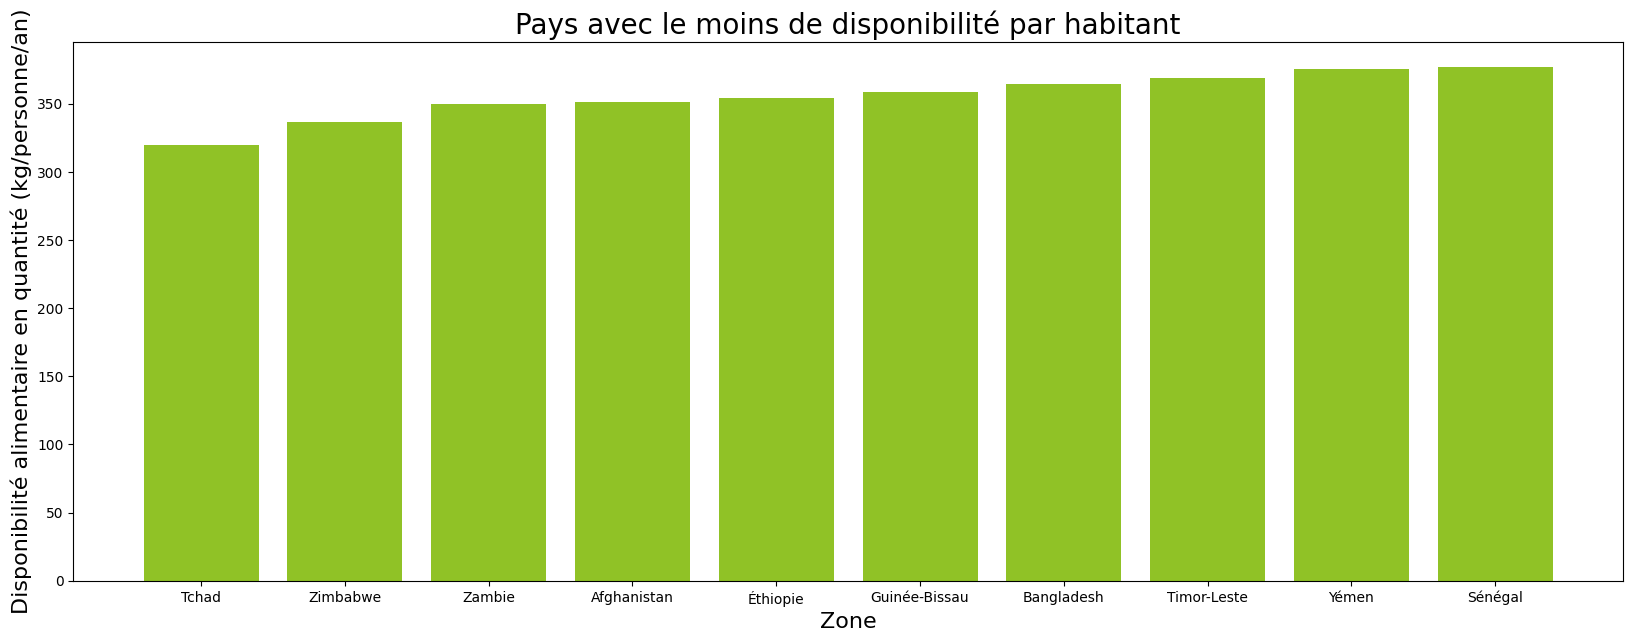

In [69]:
plt.figure(figsize=(20, 7))
plt.bar(height=Dispo_moins['Disponibilité alimentaire en quantité (kg/personne/an)'],x=Dispo_moins['Zone'], color='#90c226')
plt.title("Pays avec le moins de disponibilité par habitant", fontsize=20)
plt.xlabel('Zone', fontsize=16)
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)', fontsize=16)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [70]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
Dispo_plus = Dispo_Pays.groupby('Zone').sum()
Dispo_plus = Dispo_plus.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending = False).head(10).reset_index()

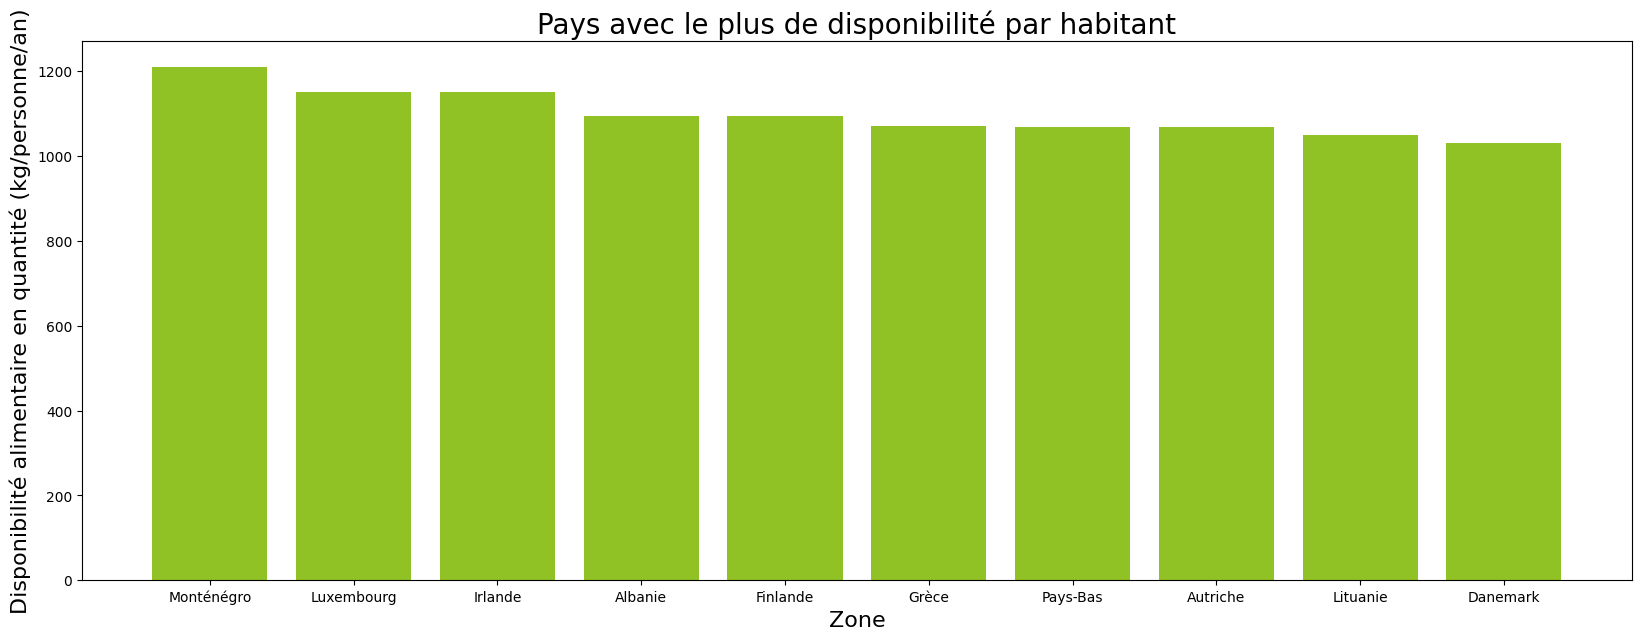

In [71]:
plt.figure(figsize=(20, 7))
plt.bar(height=Dispo_plus['Disponibilité alimentaire en quantité (kg/personne/an)'],x=Dispo_plus['Zone'], color='#90c226')
plt.title("Pays avec le plus de disponibilité par habitant", fontsize=20)
plt.xlabel('Zone', fontsize=16)
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)', fontsize=16)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [72]:
#création d'un dataframe avec uniquement la Thaïlande 
Pays= 'Thaïlande'

In [73]:
#Calcul de la sous nutrition en Thaïlande
Sous_nutThai2017 = sous_nutrition.loc[sous_nutrition['Zone']==(Pays)].loc[sous_nutrition.loc[sous_nutrition['Zone']==(Pays)]['Année'] =="2016-2018"]
Sous_nutThai2017

,Zone,Année,sous_nutrition
1114,Thaïlande,2016-2018,6200000.0


In [74]:
Pop_Thai2017 = population.loc[population['Zone'] ==(Pays)].loc[population.loc[population['Zone'] ==(Pays)]['Année']== 2017]
Pop_Thai2017

,Zone,Année,Population
1312,Thaïlande,2017,69209810.0


In [75]:
Etat2017_Thai = pd.merge(Sous_nutThai2017, Pop_Thai2017, on='Zone')
Etat2017_Thai

,Zone,Année_x,sous_nutrition,Année_y,Population
0,Thaïlande,2016-2018,6200000.0,2017,69209810.0


In [76]:
print("La proportion de personnes en sous-nutrition en",Pays,"et de {} %".format(round((Etat2017_Thai['sous_nutrition']/Etat2017_Thai['Population']*100).sum(),2)))

La proportion de personnes en sous-nutrition en Thaïlande et de 8.96 %


In [77]:
dispo_Magnoc_thai = dispo_alimentaire.loc[dispo_alimentaire['Zone']==(Pays)].loc[dispo_alimentaire['Produit'] == 'Manioc']
dispo_Magnoc_thai

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [78]:
# On calcule la proportion exportée en fonction de la proportion
dispo_Magnoc_thai['Exportations - Quantité'].sum()*100/dispo_Magnoc_thai['Disponibilité intérieure'].sum()

402.52234993614303

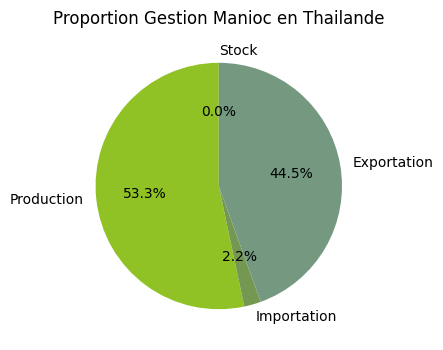

In [79]:
##Affichage de la proportion gestion Manioc en Thailande
Prod_Man_Thai = dispo_Magnoc_thai['Production'].sum()
Import_Man_Thai = dispo_Magnoc_thai['Importations - Quantité'].sum()
Expor_Man_Thai = dispo_Magnoc_thai['Exportations - Quantité'].sum()
Stock_Man_Thai = dispo_Magnoc_thai['Variation de stock'].sum()


# Créer les données pour le graphique
labels = ['Production', 'Importation','Exportation', 'Stock']
values = [Prod_Man_Thai, Import_Man_Thai, Expor_Man_Thai, Stock_Man_Thai,  ]
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#90c226','#749851','#749980','#749751'])
plt.title("Proportion Gestion Manioc en Thailande")
plt.show()

In [80]:
dispo_Magnoc_thai.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [81]:
dispo_util_thai = dispo_Magnoc_thai.drop(['Zone', 'Produit', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité','Production',
       'Variation de stock'], axis = 1)

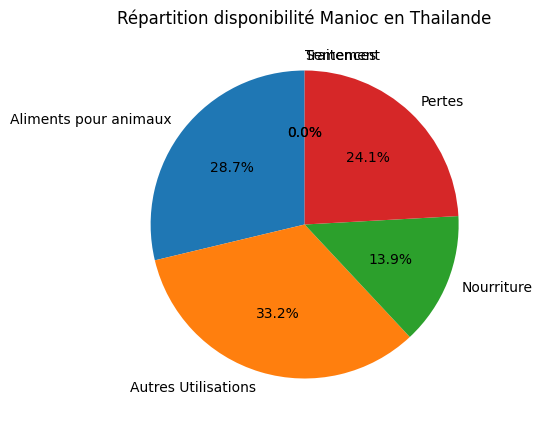

In [82]:
#Répartition usage Magnoc
values = []
labels = dispo_util_thai.columns

# Boucle pour calculer la somme de chaque colonne
for col in dispo_util_thai.columns:
    values.append(dispo_util_thai[col].sum())

# Création du graphique en camembert
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Répartition disponibilité Manioc en Thailande')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [83]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [84]:
Evol_sous_nut = sous_nutrition.pivot_table(index='Zone', columns='Année', values='sous_nutrition', aggfunc='sum', fill_value=0)

In [85]:
Evol_sous_nut['Total'] = Evol_sous_nut.sum(axis=1)

In [86]:
Evol_sous_nut = (Evol_sous_nut.sort_values(['Total'], ascending = False).head(50).reset_index())

In [87]:
ListeSnut = Evol_sous_nut['Zone'].tolist()

In [88]:
aide_alimentaireconclu = aide_alimentaire.pivot_table(index='Zone', columns='Année', values='Valeur', aggfunc='sum', fill_value=0)
aide_alimentaireconclu.reset_index(inplace = True)

In [93]:
#Analyse de l'évolution de l'aide alimentaire en général
aide_alimentaireconclu.describe()

Année,2013,2014,2015,2016
count,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01
mean,5.481150e+07,5.183095e+07,2.878299e+07,9.783789e+06
std,1.066510e+08,1.183078e+08,7.702659e+07,5.568719e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.843000e+06,1.374500e+06,5.565000e+05,0.000000e+00
50%,1.740300e+07,1.080400e+07,6.178000e+06,0.000000e+00
75%,5.330750e+07,3.539600e+07,2.150650e+07,5.790000e+05
max,5.914040e+08,6.518700e+08,5.249490e+08,4.655740e+08


In [96]:
aide_compare = aide_alimentaire['Zone'].unique().tolist()

In [101]:
#Comparaison des aides
# Pays en sous nutrition mais sans aide alimentaire
delta1 = list(set(ListeSnut) - set(aide_compare))
# Pays ayant reçu de l'aide mais n'étant pas indiqué en sous nutrition
delta2 = list(set(aide_compare) - set(ListeSnut))

print("Pays en sous nutrition mais sans aide :", delta1)
print()
print("Pays en aide mais pas indiqués en sous nutrition :", delta2)

Pays en sous nutrition mais sans aide : ['Afrique du Sud', 'Thaïlande', 'Pérou', 'Viet Nam', 'Arabie saoudite', 'Nigéria', 'Venezuela (République bolivarienne du)', 'Inde', 'Ouzbékistan', 'Indonésie', 'Maroc', 'Mexique']

Pays en aide mais pas indiqué en sous nutrition : ['Jordanie', 'Zambie', 'République dominicaine', 'Kirghizistan', 'Comores', 'Cuba', 'Somalie', 'Timor-Leste', 'Bénin', 'République arabe syrienne', 'Guinée-Bissau', 'République centrafricaine', 'Swaziland', 'Liban', 'Sao Tomé-et-Principe', 'Djibouti', 'Burundi', 'République démocratique du Congo', 'Nicaragua', 'Zimbabwe', 'Tadjikistan', 'Libye', 'Ouganda', 'Gambie', 'Bhoutan', 'Mali', 'Géorgie', 'Guinée', 'Vanuatu', 'El Salvador', 'Lesotho', 'Soudan du Sud', 'Yémen', 'Niger', 'Palestine', 'Chine, continentale', 'Mauritanie', 'République démocratique populaire lao']


In [103]:
#Etat de la dispo alimentaire
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,1.560500e+04,1.560500e+04,15605.000000,15605.000000,15605.000000,15605.000000,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04
mean,8.357866e+07,5.543243e+07,31.748927,7.830948,0.969754,0.906513,6.311435e+08,8.664902e+07,8.305370e+07,3.124805e+08,2.907389e+07,6.414406e+08,9.912272e+06,1.412808e+08,-6.690292e+06
std,1.779289e+09,3.013630e+09,102.961194,23.478909,3.246695,3.143516,9.002564e+09,9.334352e+08,7.000995e+08,4.242855e+09,5.846722e+08,9.270864e+09,1.948978e+08,3.992568e+09,3.623808e+08
min,0.000000e+00,0.000000e+00,-21.000000,-1.930000,-0.030000,-0.370000,-3.430000e+09,-4.100000e+07,-2.010000e+08,-2.460000e+08,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+07,-3.986300e+10
25%,0.000000e+00,0.000000e+00,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,3.000000,0.520000,0.020000,0.020000,6.000000e+06,0.000000e+00,1.000000e+06,3.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,18.000000,4.270000,0.310000,0.350000,7.300000e+07,4.000000e+06,1.600000e+07,4.000000e+07,0.000000e+00,4.200000e+07,0.000000e+00,0.000000e+00,0.000000e+00
max,1.500000e+11,3.473090e+11,1711.000000,430.760000,60.760000,54.970000,7.392670e+11,4.279700e+10,6.338100e+10,4.268500e+11,5.504700e+10,7.392670e+11,1.706000e+10,3.267110e+11,5.284000e+09


In [105]:
#Identification des pertes les plus importantes
dispo_alimentaire.sort_values(['Pertes'], ascending = False).head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2163,Brésil,"Sucre, canne",vegetale,6.900000e+09,3.473090e+11,13.0,16.47,0.09,0.05,7.392670e+11,0.000000e+00,0.000000e+00,3.300000e+09,5.504700e+10,7.392670e+11,0.000000e+00,3.267110e+11,0.000000e+00
3321,"Chine, continentale","Légumes, Autres",vegetale,3.558200e+10,0.000000e+00,203.0,308.07,1.76,11.47,5.000700e+11,8.084000e+09,3.040000e+08,4.268500e+11,3.763800e+10,5.078500e+11,0.000000e+00,0.000000e+00,0.000000e+00
6263,Inde,Pommes de Terre,vegetale,0.000000e+00,1.400000e+07,45.0,24.40,0.07,1.07,4.513500e+10,2.330000e+08,2.400000e+07,3.054600e+10,1.133600e+10,4.534400e+10,3.238000e+09,0.000000e+00,0.000000e+00
3324,"Chine, continentale",Maïs,vegetale,1.500000e+11,3.517200e+10,54.0,6.78,0.18,1.17,2.129980e+11,2.510000e+08,3.269000e+09,9.391000e+09,1.025000e+10,2.184890e+11,1.650000e+09,6.535000e+09,-8.509000e+09
2130,Brésil,Maïs,vegetale,4.048700e+10,0.000000e+00,240.0,28.01,0.98,5.31,5.473700e+10,2.678000e+10,9.790000e+08,5.612000e+09,8.145000e+09,8.053800e+10,3.860000e+08,1.080000e+08,0.000000e+00
